This Jupyter Notebook demonstrates the analysis and visualization of dependencies within a Java project using the JavaAnalyzer from the dependency_analyzer module.

In [ ]:
from dependency_analyzer.java_analyze import JavaAnalyzer

In [2]:
#Using following JDBC Project from github: https://github.com/adilmohak/spring-mvc-bookstore
analyzer = JavaAnalyzer()
G, exectuion_order = analyzer.get_execution_order('/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/')

In [3]:
for dependencies in exectuion_order:
    print (dependencies)

['/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Book.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Emp.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Feedback.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Purchase.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/User.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Login.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/dao/CustomerDao.java', '/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bookstore/src/main/java/com/bookstore/beans/Customer.java']
['/usr/local/google/home/gauravpurohit/ai/sample/spring-mvc-bo

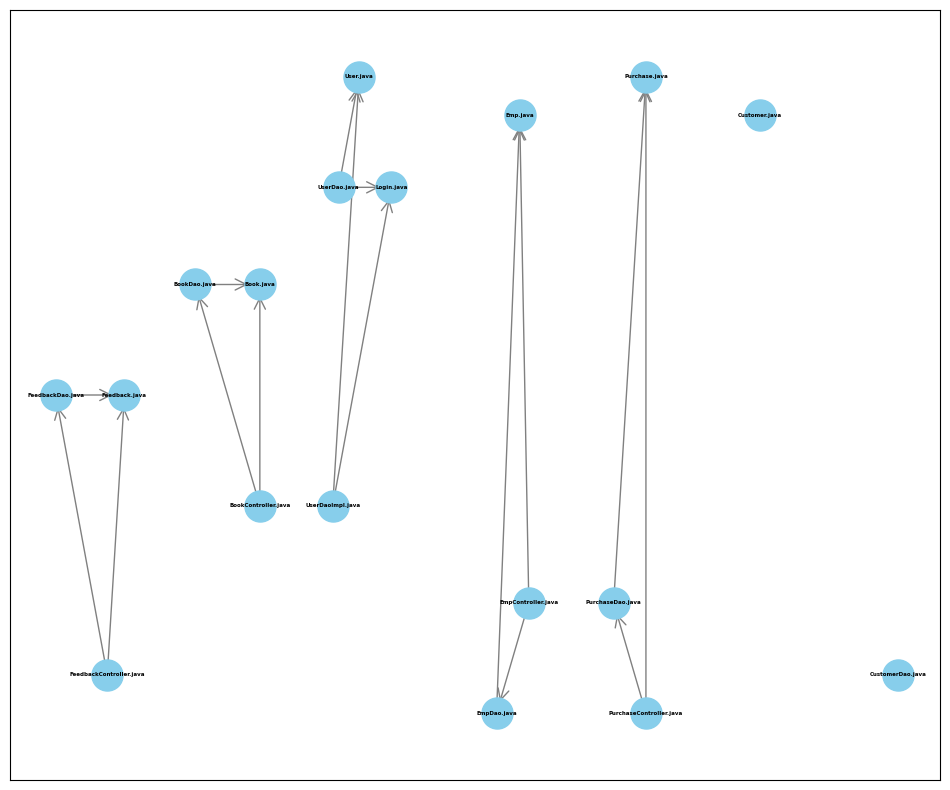

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import os
mapping = {old_node: os.path.basename(old_node) for old_node in G.nodes()}
nx.relabel_nodes(G, mapping, copy=False)

components = list(nx.weakly_connected_components(G))

# Plotting
plt.figure(figsize=(12, 10))  # Increased figure size for more space

# Adjusted layout for better component separation
pos = nx.circular_layout(G)  # Seed for reproducibility

for i, component in enumerate(components):
    subgraph = G.subgraph(component)

    # Offset positions to avoid component overlap
    component_pos = {node: (pos[node][0] + i * 4, pos[node][1]) for node in component}

    # Draw each component separately, preserving directionality
    nx.draw_networkx_edges(subgraph, component_pos, edge_color='gray', arrowsize=20, arrowstyle='->')
    nx.draw_networkx_nodes(subgraph, component_pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_labels(subgraph, component_pos, font_size=4, font_weight='bold')

# Display the graph
plt.show()